# Matrix solver evaluation
This notebook evaluates three methods for solving the linear system that emerges from Cheng's approach [1].
1) _numpy.linalg.solve_;
2) _scipy.sparse.linalg.solve_;
3) _Greene_'s method.

Since the same numerical results are expected in all three cases, as these methods all solve the system exactly, the evaluation will be performed in terms of computational time. However, the results of each method will be compared with those of an experimental **test case** in order to verify the correctness of the implementation.

[1] Cheng, S.K., 1984. Constitutive Correlations for wire-wrapped subchannel analysis under forced and mixed convection conditions (Ph.D. thesis). MIT.

In [1]:
import numpy as np
from _common import eval_time, get_results, read_Tout, plot_results, T_IN

## Time effort evaluation

Average time effort is calculated for each method in this section, by running an input based on the **KALLA** bundle from [2].

[2] J. Pacio, T. Wetzel, H. Doolaard, F. Roelofs, and and K. Van Tichelen. Thermal-hydrualic study of the lbe fuel assembly in the myrrha reactor: experiments and simulations. Nuclear Engineering and Design, 312:327–337, 2017.


In [4]:
methods = ['numpy', 'scipy', 'greene']
avg_times = {}
for method in methods:
    avg_times[method] = eval_time(method)
    print(f"Average time for {method}: {avg_times[method]:.6f} seconds")

Average time for numpy: 1.230894 seconds
Average time for scipy: 1.303481 seconds
Average time for greene: 1.321443 seconds


## Implementation verification

To verify the implementation of the three methods, their results are compared between each other and with an experimental test case (**KALLA** bundle from [2]).

The objective of this section is to verify that the three methods return the same results, as they solve the linear system exactly. This would be an indicator of the correct implementation in the code. 

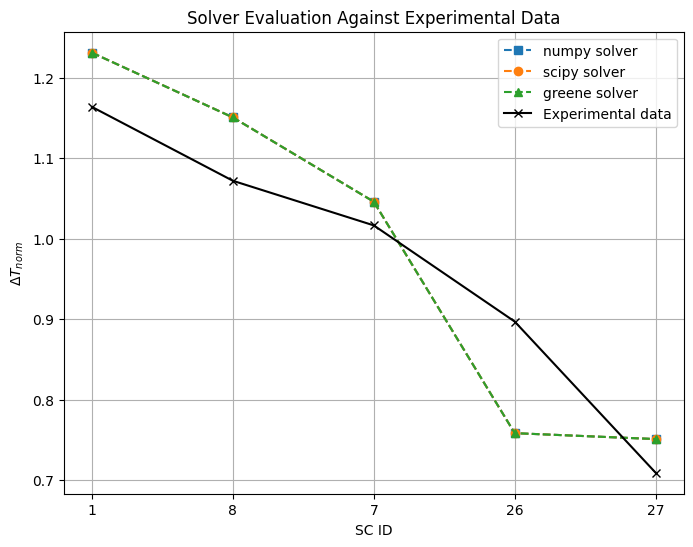

In [3]:
results_dict = {}
for method in ['numpy', 'scipy', 'greene']:
    results_dict[method] = (np.array(get_results(method)) - T_IN) \
        / (read_Tout(method) - T_IN)

plot_results(results_dict)